<a href="https://colab.research.google.com/github/kenny2408/Redes-Neuronales-con-Python-y-Keras/blob/main/modelo_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando librerias

In [42]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import models, layers, optimizers
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt

## Descargando datos

In [8]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [14]:
train_data.shape

(404, 13)

In [9]:
train_data[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [10]:
train_targets[1]

42.3

## Normalización

In [11]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

## Definiendo nuestra red

In [73]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae']
    )
    return model

## K - fold validation

In [74]:
k = 4
num_val_samples = len(train_data) // k
num_epoch = 80
all_history = []

In [75]:
for i in range(k):
    print('Fold', i)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [
            train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]
        ],
        axis=0
    )

    partial_train_targets = np.concatenate(
        [
            train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]
        ],
        axis=0
    )
    model = build_model_regression(13)
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epoch,
        batch_size=16,
        validation_data=(val_data, val_targets),
        verbose=0,
        callbacks=TqdmCallback(verbose=1)
    )
    all_history.append(history.history['val_mae'])

Fold 0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Fold 1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Fold 2


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Fold 3


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Media de todos los MAE

In [76]:
len(all_history[0])

80

In [77]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [78]:
all_mae_avg

0     19.117666
1     15.536821
2     11.052386
3      7.352927
4      5.587673
        ...    
75     2.384024
76     2.344180
77     2.416079
78     2.349128
79     2.370417
Length: 80, dtype: float64

## Visualizando resultados

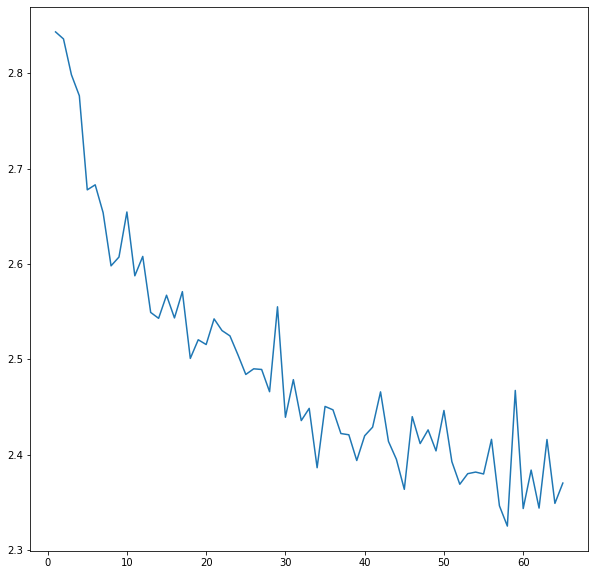

In [79]:
fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, len(all_mae_avg[15:]) + 1), all_mae_avg[15:])
plt.show()

## Evaluando el modelo

In [80]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 19.5266 - mae: 2.7990


[19.526636123657227, 2.79901123046875]